<a href="https://colab.research.google.com/github/isnabash/blink/blob/master/Regress%C3%A3o_Linear_Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [7]:
df.shape

(13730, 167)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Estados de residencia dos participantes')

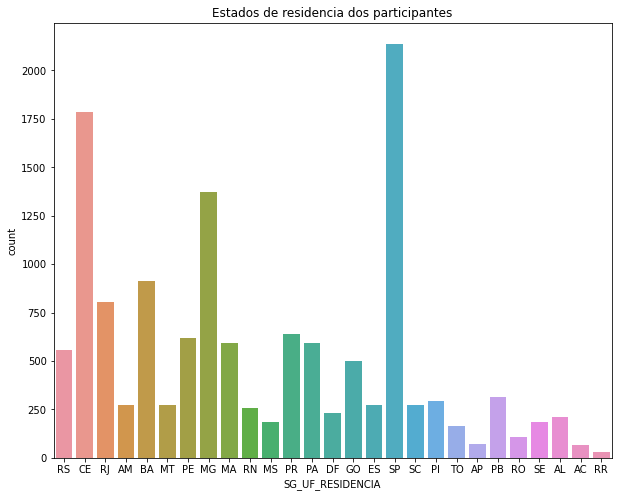

In [13]:
%matplotlib inline
plt.rc('figure', figsize=(10,8))
sns.countplot(df['SG_UF_RESIDENCIA'])
plt.title('Estados de residencia dos participantes')

In [15]:
df['TP_SEXO'].value_counts()

F    8491
M    5239
Name: TP_SEXO, dtype: int64

# New Section

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sexo dos participantes do enem 2016')

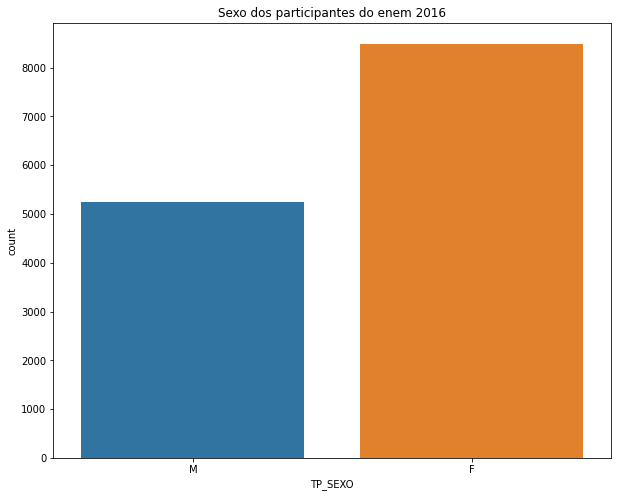

In [14]:
sns.countplot(df['TP_SEXO'])
plt.title('Sexo dos participantes do enem 2016')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tipo de escola dos participantes 2016')

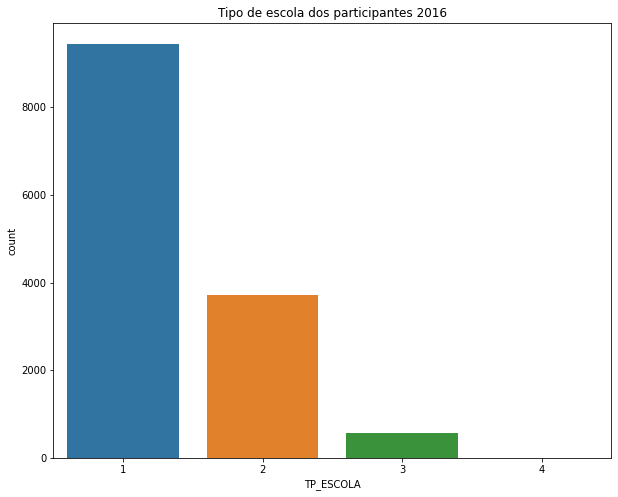

In [16]:
sns.countplot(df['TP_ESCOLA'])
plt.title('Tipo de escola dos participantes 2016')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade dos participantes de 2016')

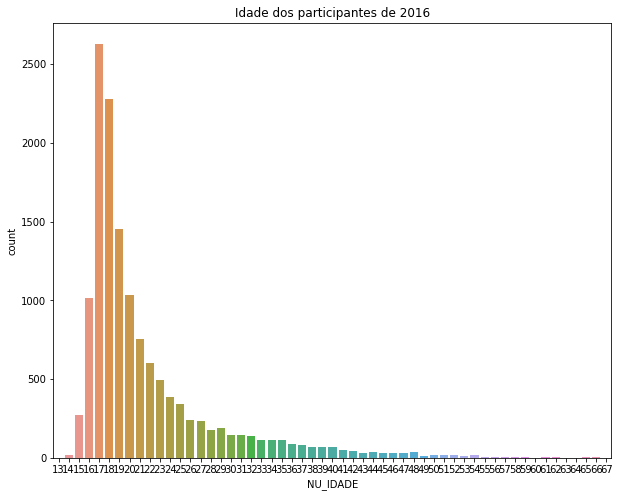

In [17]:
sns.countplot(df['NU_IDADE'])
plt.title('Idade dos participantes de 2016')

In [19]:
pessoas_mt = df['TP_PRESENCA_MT'].value_counts()

df.shape

(13730, 167)

In [20]:
pessoas_mt

1    10133
0     3592
2        5
Name: TP_PRESENCA_MT, dtype: int64

#PORCENTAGEM DAS PESSOAS QUE APARECERAM NA PROVA

In [25]:
pessoas_mt[1]*100/df.shape[0]

73.80189366351055

In [30]:
df[df['NU_NOTA_MT'].isnull()].shape[0]

3597

In [31]:
df[df['NU_NOTA_MT'] == 0].head()['NU_NOTA_MT']

111     0.0
429     0.0
3442    0.0
3783    0.0
4927    0.0
Name: NU_NOTA_MT, dtype: float64

In [33]:
mat_min = df['NU_NOTA_MT'].min()
mat_min

0.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribuição das notas de mat')

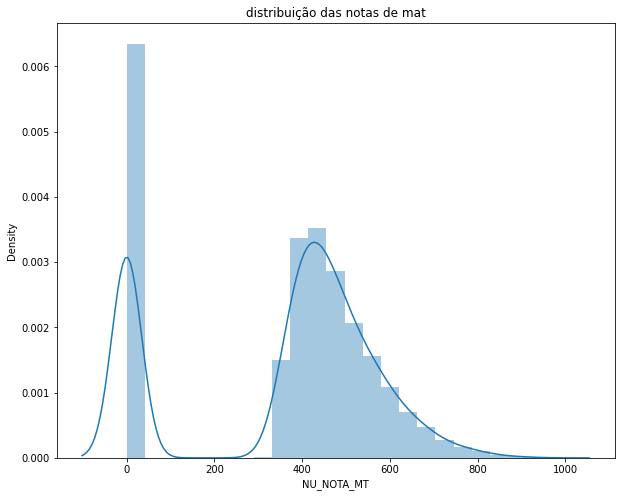

In [37]:
df.update(df['NU_NOTA_MT'].fillna(mat_min))
sns.distplot(df['NU_NOTA_MT'])
plt.title('distribuição das notas de mat')

In [39]:
df['NU_NOTA_MT'].max()

952.0

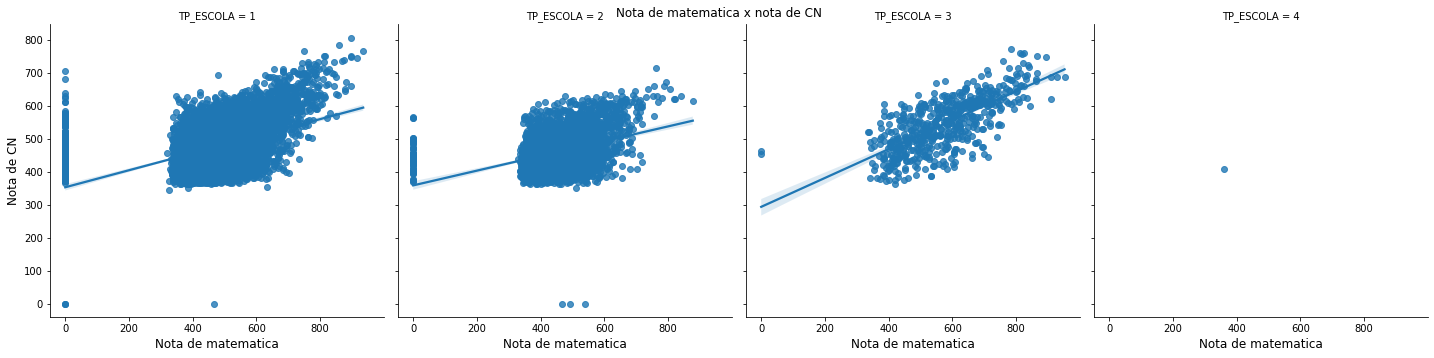

In [43]:
ax = sns.lmplot(x="NU_NOTA_MT", y="NU_NOTA_CN", data=df, col= 'TP_ESCOLA')
ax.fig.suptitle("Nota de matematica x nota de CN")
ax.set_xlabels("Nota de matematica", fontsize=12)
ax.set_ylabels("Nota de CN", fontsize=12)
ax

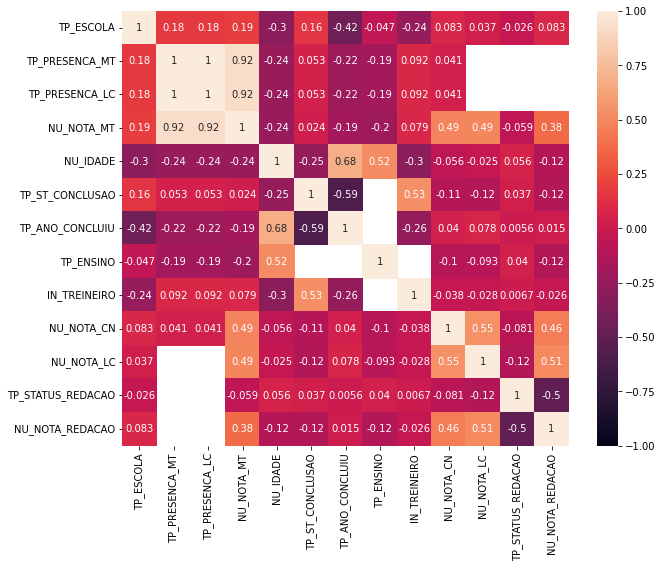

In [80]:
df_new = df[['TP_ESCOLA', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'NU_NOTA_MT'
                   ,'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU'
                   ,'TP_ENSINO', 'IN_TREINEIRO', 'NU_NOTA_CN'
                   ,'NU_NOTA_LC', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO']]
df_new

sns.heatmap(df_new.corr(), annot=True, vmin=-1,vmax=1)


In [81]:
df_new = df_new.fillna(value=0)
df_test = df_test.fillna(value=0)
#df_new = df_new.fillna(value=0)
df_new.isnull().values.any()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TP_ESCOLA          13730 non-null  int64  
 1   TP_PRESENCA_MT     13730 non-null  int64  
 2   TP_PRESENCA_LC     13730 non-null  int64  
 3   NU_NOTA_MT         13730 non-null  float64
 4   NU_IDADE           13730 non-null  int64  
 5   TP_ST_CONCLUSAO    13730 non-null  int64  
 6   TP_ANO_CONCLUIU    13730 non-null  int64  
 7   TP_ENSINO          13730 non-null  float64
 8   IN_TREINEIRO       13730 non-null  int64  
 9   NU_NOTA_CN         13730 non-null  float64
 10  NU_NOTA_LC         13730 non-null  float64
 11  TP_STATUS_REDACAO  13730 non-null  float64
 12  NU_NOTA_REDACAO    13730 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.4 MB


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [83]:
modelo = LinearRegression()

In [84]:
y = df_new['NU_NOTA_MT']

x = df_new[['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_PRESENCA_MT']]



In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2811)

In [86]:
print(x_train.shape)
print(x_test.shape)

(9611, 4)
(4119, 4)


In [87]:
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
print('R quadrado = {}'.format(modelo.score(x_train, y_train)))

R quadrado = 0.9022881077478778


In [89]:
lm = modelo.predict(x_test)
lm

array([562.36421322, 463.61081299,  94.66772135, ...,  -6.50490731,
        -6.50490731, 585.68844707])

In [90]:
print('R quadrado = {}'.format(metrics.r2_score(y_test, lm)))

R quadrado = 0.9046325227766584


In [91]:
import numpy as np
index = ['INTERCEPT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_PRESENCA_MT']
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])

,Parametros
INTERCEPT,-6.504907
NU_NOTA_CN,0.228742
NU_NOTA_LC,0.528804
NU_NOTA_REDACAO,0.078287
TP_PRESENCA_MT,66.070119


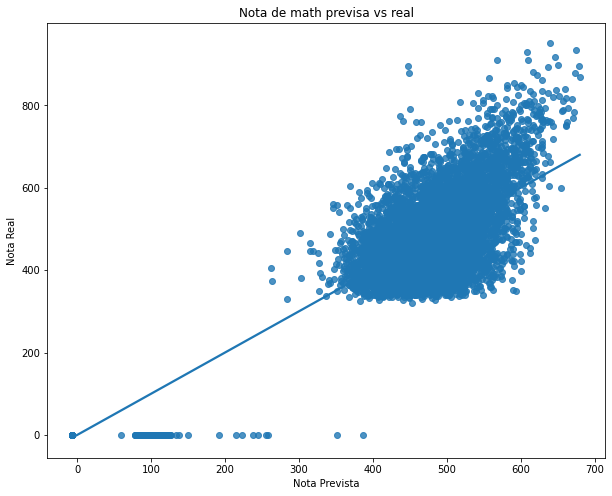

In [94]:
y_predict_train = modelo.predict(x_train)

ax = sns.regplot(x=y_predict_train, y = y_train)
ax.set_title('Nota de math previsa vs real')
ax.set_xlabel("Nota Prevista")
ax.set_ylabel("Nota Real")
ax